## Goal

CNN으로 handwriting을 인식해보기

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


Using TensorFlow backend.


In [3]:
x = np.zeros((3,1,2))
print(x)

[[[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]]


### 간단한 이해
<img src=1.jpg width=400>

In [4]:
# 15*3은 원,사각형,삼각형의 총 개수 / 24,24는 각 이미지의 grayscale의 사이즈가 (24,24)이어서
X_train = np.zeros((15*3, 24,24)) 
y_train = np.zeros(15*3)

for i in range(15) :
    img1 = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)
    X_train[i,:,:] = img1
    y_train[i] = 0 # 원은 0으로 나타내겠다
    
    img2 = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)
    X_train[15+i,:,:] = img2
    y_train[15+i] = 1 # 사각형은 1로 나타내겠다
    
    img3 = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)
    X_train[30+i,:,:] = img3
    y_train[30+i] = 2 # 삼각형은 2로 나타내겠다

In [5]:
X_test_easy = np.zeros((5*3, 24,24))
y_test_easy = np.zeros(5*3)

for i in range(5) :    
    img1 = cv2.imread('hard_handwriting_shape/test_easy/circle/circle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[i,:,:] = img1
    y_test_easy[i] = 0 # 원은 0으로 나타내겠다
    
    img2 = cv2.imread('hard_handwriting_shape/test_easy/rectangle/rectangle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[5+i,:,:] = img2
    y_test_easy[5+i] = 1 # 사각형은 1로 나타내겠다

    img3 = cv2.imread('hard_handwriting_shape/test_easy/triangle/triangle{0:03d}.png'.format(i+16), 0)        
    X_test_easy[10+i,:,:] = img3
    y_test_easy[10+i] = 2 # 삼각형은 2로 나타내겠다

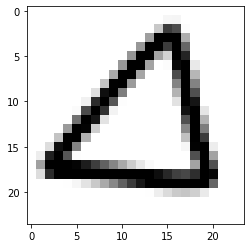

Label:  2.0


In [6]:
plt.imshow(X_test_easy[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test_easy[14])

In [7]:
y_train = to_categorical(y_train) # one-hot encoding
y_test_easy = to_categorical(y_test_easy) # one-hot encoding
print(X_train.shape, X_test_easy.shape, y_train.shape, y_test_easy.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [8]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)    # (45, 24, 24) --> (45, 24, 24, 1)
X_test_easy =  X_test_easy.reshape(-1, 24,24,1)  # (15, 24, 24) --> (15, 24, 24, 1)
print(X_train.shape)
print(X_test_easy.shape)
print(y_train.shape)
print(y_test_easy.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


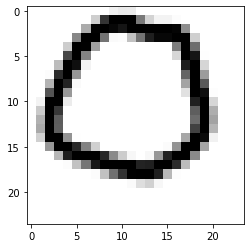

In [9]:
plt.imshow(X_train[2,:,:,0], cmap="gray") 
plt.show()

In [12]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [13]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test_easy, y_test_easy), verbose = 0)

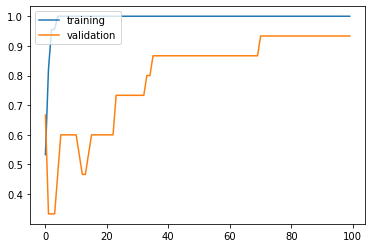

15/15 [==============================] - 0s 5ms/step
[0.1706986278295517, 0.9333333373069763]


In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test_easy, y_test_easy)
print(results) # This code provides the tuple consisting of (loss) &  (accuracy).

---

## 더 어려운 데이터인 test데이터들로 하기

In [11]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img1 = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img1
    y_test[i] = 0
    
    img2 = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img2
    y_test[5+i] = 1

    img3 = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img3
    y_test[10+i] = 2

In [12]:
y_test = to_categorical(y_test)
print(X_test.shape,  y_test.shape)

(15, 24, 24) (15, 3)


In [13]:
X_test =  X_test.reshape(-1, 24,24,1)
print(X_test.shape)
print(y_test.shape)

(15, 24, 24, 1)
(15, 3)


In [14]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

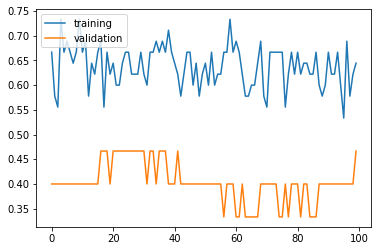

15/15 [==============================] - 0s 260us/step
[7.375422477722168, 0.46666666865348816]


In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)       

## filter가 뭐였는지 알아보기
https://stackoverflow.com/questions/53503389/how-to-set-parameters-in-keras-to-be-non-trainable

In [17]:
for l in model.layers:
    print(l.name)
    print(l.trainable) # 학습을 하는 과정에서 parameter들을 바꾸는 것들 

conv2d_1
True
batch_normalization_1
True
activation_1
True
conv2d_2
True
batch_normalization_2
True
activation_2
True
max_pooling2d_1
True
flatten_1
True
dense_1
True
activation_3
True
dense_2
True


In [18]:
w = model.layers[0].get_weights()
print(w[0].shape)
print(w[1].shape) # bias의 개수
print(w[1][0]) # 0번째 필터의 bias

print(w[0][:,:,0,0]) # 학습된 필터
print(w[0][:,:,0,1]) # 학습된 필터
print(w)

(3, 3, 1, 32)
(32,)
0.0001314186
[[ 0.03630345  0.06496654 -0.00901261]
 [ 0.06177316  0.04208034  0.13021365]
 [ 0.07122957  0.0075383  -0.0417733 ]]
[[-0.07785022 -0.12866041  0.0247063 ]
 [ 0.05664395  0.09307297 -0.12902838]
 [-0.11578154 -0.13359186 -0.14215678]]
[array([[[[ 0.03630345, -0.07785022, -0.05075116, -0.10983228,
          -0.10207868, -0.05899776,  0.09279389, -0.01237613,
          -0.09645763,  0.13543802, -0.05313732,  0.1126999 ,
          -0.02114895, -0.00122262,  0.02989903,  0.03852498,
          -0.12702346, -0.137651  ,  0.02947288, -0.04888759,
           0.03949951, -0.0003673 , -0.11670654,  0.02768966,
          -0.10918019,  0.13363113,  0.1593071 ,  0.10567673,
           0.09401499, -0.11319916,  0.13172124,  0.04012087]],

        [[ 0.06496654, -0.12866041,  0.03037004, -0.02387207,
           0.00059847, -0.11813046, -0.07982048,  0.07522371,
           0.01755857,  0.14530408, -0.11083119, -0.08418126,
          -0.05065912, -0.07881035,  0.048115

In [19]:
# filter 적용하고 bias까지 다 더해진 상태
model.layers[0].output

# output이 밑에처럼 나오는데
# <tf.Tensor 'conv2d_1/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>
# 여기서 BiasAdd:0은 bias가 0이 아니라 conv2d_1/BiasAdd 텐서의 이름이 '0'이라는 뜻!

<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>

(15, 22, 22, 32)


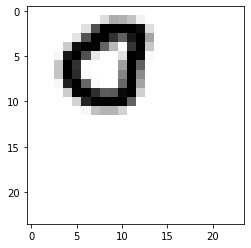

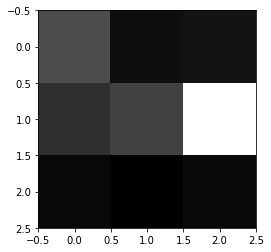

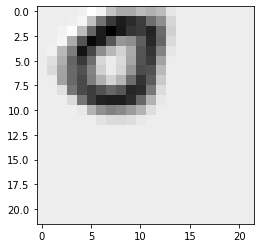

In [20]:
from keras.models import Model

my_layer_model = Model(inputs=model.input,
                      outputs=model.layers[0].output) # 그릇이 24 x 24 x 1
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)


# plt.imshow(X_test[0,:,:,0], cmap='gray')
# plt.show()
# plt.imshow(output[0,:,:,0], cmap='gray')
# # 0번째 이미지
# # 0번째 필터
# # 출력 = 0번째 이미지*(0번째 필터+b)




iFilter = 5
iImg = 1

# 원본 이미지(1번 이미지)
plt.imshow(X_test[iImg,:,:,0], cmap='gray')
plt.show()
# filter
w = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0,iFilter]
plt.imshow(f, cmap='gray')
plt.show()

# 원본 이미지에 적용한 출력
plt.imshow(output[iImg,:,:,0], cmap='gray')
plt.show()


# 1번째 이미지
# 5번째 필터
# 출력 = 0번째 이미지*(0번째 필터+b)



In [21]:
# flatten으로 길게 늘어뜨려놓은 영상

my_layer_model = Model(inputs=model.input,
                      outputs=model.layers[7].output)    # 위의 summary에서 flatten이 8번째이므로 index는 7이다.
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)



########################################################################
# 더 나은 방법

my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("flatten_1").output) # 위의 summary에서 올려다보면 flatten의 이름을 보고 알 수 있음
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)

(15, 6400)
(15, 6400)


In [32]:
my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("dense_2").output) # 위의 summary에서 올려다보면 flatten의 이름을 보고 알 수 있음
output = my_layer_model.predict(X_test)
# predict는 메모리에 담지않고 그냥 흘려보냄 --> 최종 결과값만 받음

print(output.shape)
p = np.argmax(output, axis=1)
T = np.argmax(y_test, axis = 1)

print(p)
print(T)
print('\n')
print("맞춘 개수 = ", np.sum((p == T)*1))
print("인식률 = ", np.sum((p == T)*1)/len(p))

(15, 3)
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


맞춘 개수 =  7
인식률 =  0.4666666666666667
